<a href="https://colab.research.google.com/github/DeathlyMade/Road-Extraction-Models/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sobel Edge Detection

Key Features:


*   The Sobel Operator uses two 3x3 convolution kernels , one for detecting changes in the x-direction (horizontal edges) and one for detecting changes in the y-direction (vertical edges).
*   We find out the gradients of image intensity at each point in the x-direction as well as y direction as a sudden or continuous change in gradient shows the presence of edges


*   We calculate the gradient magnitude which combines the edge detection from x-direction as well y-direction to get the final image







In [38]:
def sobel_edge_detection(image):
    # Convert the image to grayscale as we just need to detect changes in intensity and don't need the colour channel of each pixel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Apply Gaussian smoothing to reduce noise and make edge detection more robust.
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Sobel operators
    # For sobel operator cv2.CV_64F specifies the desired depth of the output image.
    # Using a higher depth helps in capturing precise gradient values, especially when dealing with small or fine details.
    Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # Gradient magnitude
    G = np.sqrt(Gx**2 + Gy**2)

    # Normalize to range 0-255
    Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
    Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
    G = np.uint8(255 * G / np.max(G))

    return Gx, Gy, G

In [39]:
image=cv2.imread('monarch_in_may.jpg')
Gx, Gy, G = sobel_edge_detection(image)

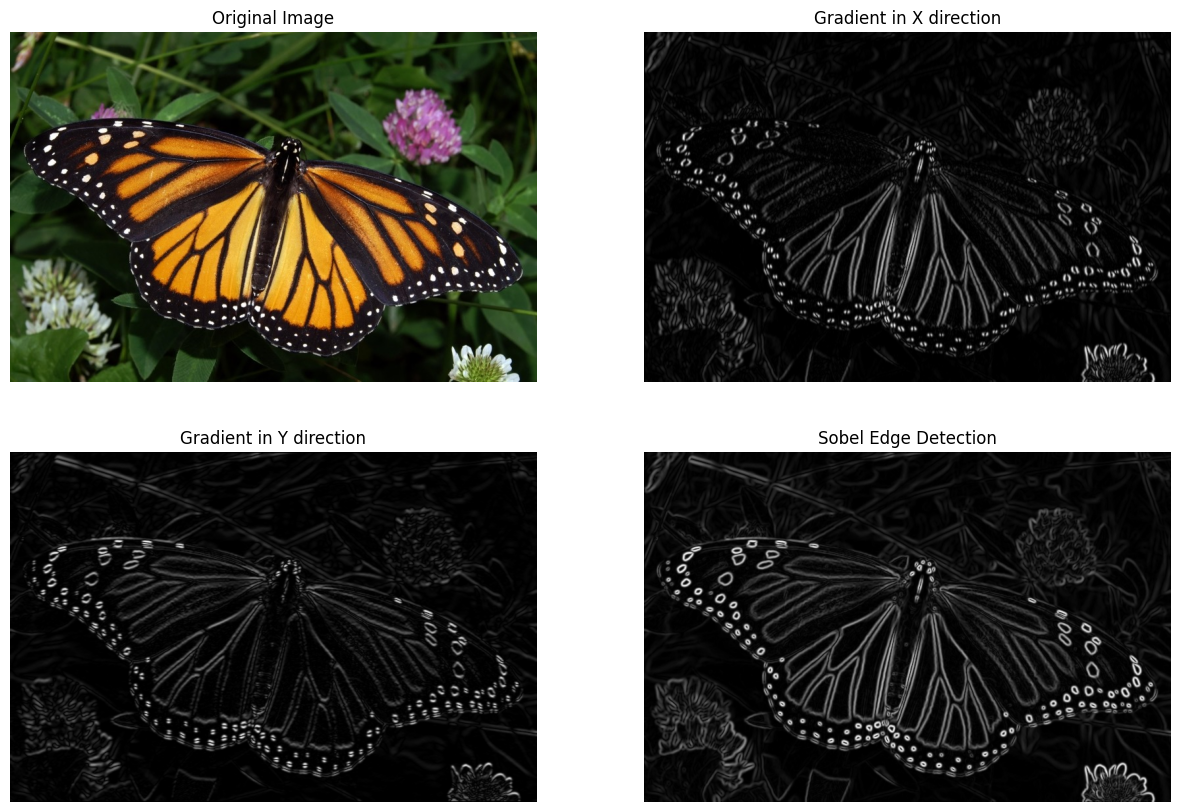

In [41]:
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

# Canny Edge Detection

Key Features:


*   Non-Maximum Suppression - We apply non-maximum suppression to thin out the edges and get rid of spurious responses to edge detection. It retains only the local maxima along the gradient direction and suppresses any pixel that is not a local maximum.
*   Double Thresholding - We classify the edges into strong, weak and non-edges on the basis of two thresholds - high and low. Edges above the high threshold are classified as strong edges, and edges between low and high are classified as weak edges.


*   We traverse the image again and retain the strong edges as well as weak edges that are connected to strong edges as they are considered true edges.




In [42]:
def canny_edge_detection(image):
    # Convert the image to grayscale as we just need to detect changes in intensity and don't need the colour channel of each pixel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian smoothing to reduce noise and make edge detection more robust.
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 100, 200)

    return edges

In [43]:
image = cv2.imread('monarch_in_may.jpg')
edges = canny_edge_detection(image)

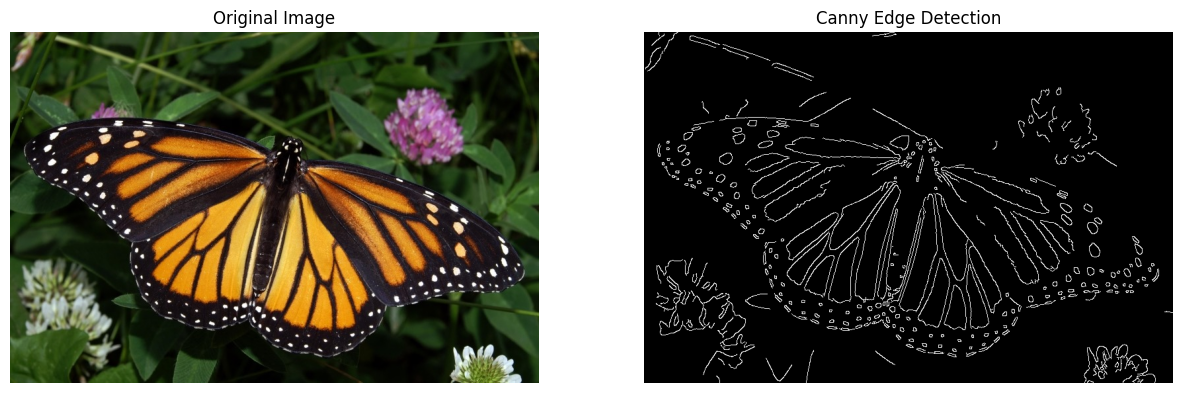

In [44]:
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

# Laplacian Edge Detection

Key Features:


*   The Laplacian operator is used to detect edges by calculating the second derivative of the image intensity.
*   The second derivative measures the rate of change of the first derivative. It is useful for detecting edges because zero-crossings (points where the second derivative changes sign) often correspond to edges.



In [34]:
def laplacian_edge_detection(image):
    # Convert the image to grayscale as we just need to detect changes in intensity and don't need the colour channel of each pixel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian smoothing to reduce noise and make edge detection more robust.
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Laplacian edge detection
    # For laplacian operator cv2.CV_64F specifies the desired depth of the output image.
    # Using a higher depth helps in capturing precise gradient values, especially when dealing with small or fine details.
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    laplacian_abs = cv2.convertScaleAbs(laplacian)

    return laplacian_abs

In [35]:
image = cv2.imread('monarch_in_may.jpg')
laplacian_abs = laplacian_edge_detection(image)

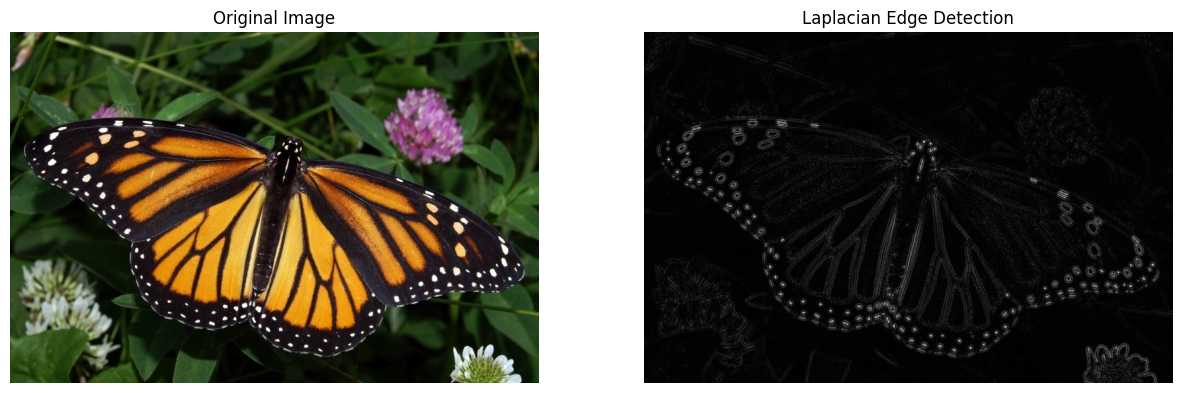

In [37]:
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

# Roberts Cross Edge Detection

Key Features:


*   We apply two 2x2 kernels, one for x-direction and other for y-direction

The kernels are:

Gx = [[1,0],
      [0,-1]]

Gy = [[0,1],
      [-1,0]]

In [15]:
def roberts_cross_edge_detection(image):
    # Convert the image to grayscale as we just need to detect changes in intensity and don't need the colour channel of each pixel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Roberts Cross kernels
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    kernel_y = np.array([[0, 1],
                         [-1, 0]])

    # Convolve the image with the kernels
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)

    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)

    # Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)

    return edges

In [16]:
image = cv2.imread('monarch_in_may.jpg')
edges = roberts_cross_edge_detection(image)

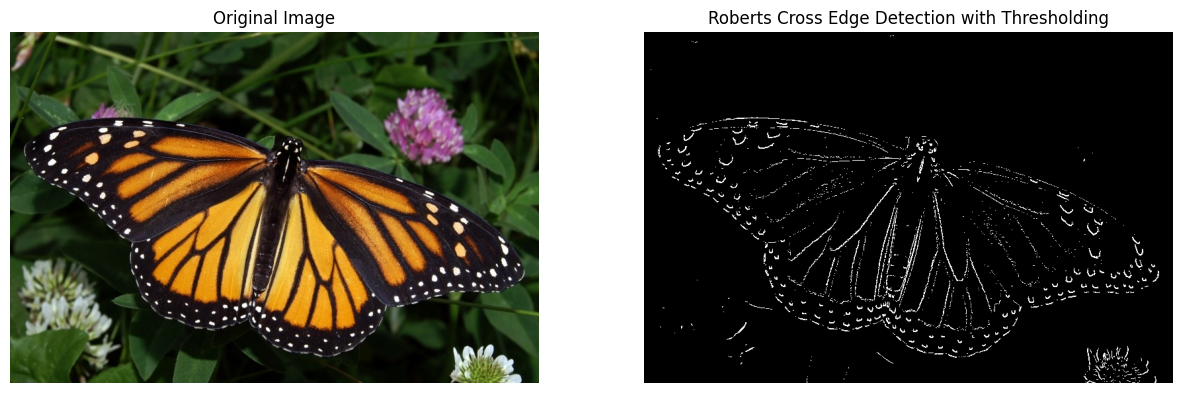

In [17]:
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Roberts Cross Edge Detection with Thresholding')
plt.axis('off')

plt.show()

# Prewitt Edge Detection

Key Features:


*   We use two 3x3 prewitt kernels, one for x-direction and other for y-direction.

The kernels are:

Gx = [[-1,0,1],
      [-1,0,1],
      [-1,0,1]]

Gy = [[-1,-1,-1],
      [0,0,0],
      [1,1,1]]

In [12]:
def prewitt_edge_detection(image):
    # Convert the image to grayscale as we just need to detect changes in intensity and don't need the colour channel of each pixel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply horizontal Prewitt kernel
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)

    # Apply vertical Prewitt kernel
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)
    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)

    # Optional: Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)

    return edges

In [13]:
image = cv2.imread('monarch_in_may.jpg')
edges = prewitt_edge_detection(image)

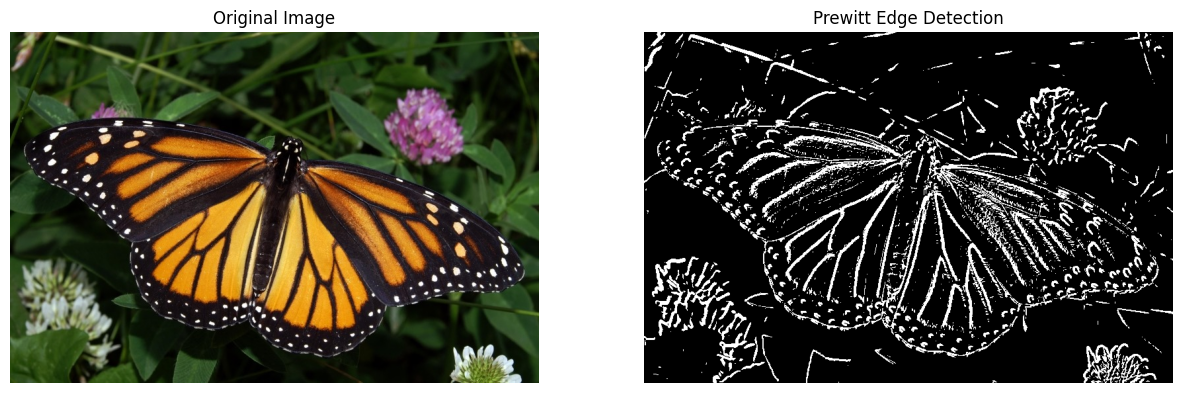

In [14]:
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.show()

# Scharr Edge Detection

Key features:

*   It is an improvement over the Sobel operator.
*   We use two 3x3 kernels, one for x-direction and other for y-direction.



In [5]:
def scharr_edge_detection(image):
    # Convert the image to grayscale as we just need to detect changes in intensity and don't need the colour channel of each pixel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Scharr operator to find the x and y gradients
    # For scharr operator cv2.CV_64F specifies the desired depth of the output image.
    # Using a higher depth helps in capturing precise gradient values, especially when dealing with small or fine details.
    Gx = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
    Gy = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)

    # Compute the gradient magnitude
    gradient_magnitude = cv2.magnitude(Gx, Gy)

    return gradient_magnitude

In [6]:
image = cv2.imread('monarch_in_may.jpg')
edges = scharr_edge_detection(image)

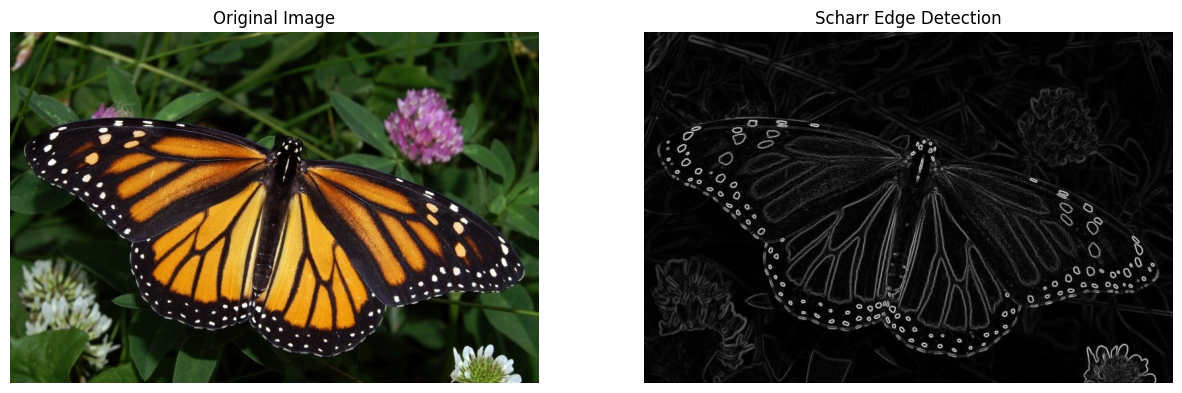

In [7]:
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Scharr Edge Detection
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Scharr Edge Detection')
plt.axis('off')

plt.show()